In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target =\
    train_test_split(fish_input, fish_target, random_state=1234)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(119, 5) (40, 5)
(119,) (40,)


In [4]:
scaler = StandardScaler()

scaler.fit(train_input)

train_input_scaled = scaler.transform(train_input)
test_input_scaled = scaler.transform(test_input)

In [6]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=1234)
sc.fit(train_input_scaled, train_target)

print(sc.score(train_input_scaled, train_target))
print(sc.score(test_input_scaled, test_target))

0.8403361344537815
0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Additional Training: partial_fit()

In [7]:
sc.partial_fit(train_input_scaled, train_target)

print(sc.score(train_input_scaled, train_target))
print(sc.score(test_input_scaled, test_target))

0.7563025210084033
0.75


### Underfitting and Overfitting

In [8]:
sc = SGDClassifier(loss='log', random_state=1234)

train_score = []
test_score = []

classes = np.unique(train_target)
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
for i in range(300):
    sc.partial_fit(train_input_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_input_scaled, train_target))
    test_score.append(sc.score(test_input_scaled, test_target))

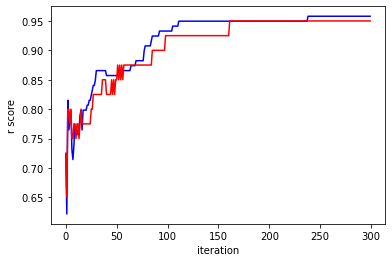

''

In [10]:
plt.plot(train_score, color='b')
plt.plot(test_score, color='r')

plt.xlabel('iteration')
plt.ylabel('r score')

plt.show()
;

In [11]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=1234)
sc.fit(train_input_scaled, train_target)

print(sc.score(train_input_scaled, train_target))
print(sc.score(test_input_scaled, test_target))

0.9243697478991597
0.9


### Hinge Loss or Support Vector Machine

In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=1234)
sc.fit(train_input_scaled, train_target)

print(sc.score(train_input_scaled, train_target))
print(sc.score(test_input_scaled, test_target))

0.8319327731092437
0.85
